In [1]:
# Importing the important libraries for the project
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats
from math import sqrt

import numpy as np
# import hvplot.pandas  # noqa
# import hvplot.dask  # noqa

# Importing Modeling Library

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor, Pool, metrics, cv
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from catboost.utils import eval_metric
# Optuna
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
import optuna.visualization as ov
import plotly.express as px
from optuna.visualization import plot_parallel_coordinate


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge, Ridge

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn import metrics

# import shap library
import shap
#  Mutual Information
from sklearn.feature_selection import mutual_info_regression

# Support Vector Regressor
from sklearn.svm import SVR

# Pre processing modules
from pandas_profiling import ProfileReport

from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import QuantileTransformer

# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

# Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance

In [2]:
cd C:\Users\User\Desktop\Petrel\results

C:\Users\User\Desktop\Petrel\results


In [7]:
Nallwellsdf = pd.read_csv('wellsgmdf.csv')
Nallwellsdf.head()

,WELL,X,Y,TVDss,DEPTH,CAL,GR,RD,NPHI,RHOB,...,ShminE3,ShminZHs,ShminZHf,ShminH,SHMAXs,SHMAXf,SHMAXE1,SHMAXE2,SHMAXE3,SHMAXE
0,G14,464542.56,137673.05,1828.11,1901.0376,15.4410,50.049301,0.70829,0.27900,2.2130,...,3976.679927,3533.626728,3687.285445,4571.241935,4383.867075,4460.696433,4593.815517,4594.793308,4605.393674,4677.371760
1,G14,464542.60,137673.08,1828.25,1901.1900,15.4401,52.155399,0.73144,0.27884,2.2130,...,3925.375589,3455.195817,3615.985029,4540.961311,4344.891365,4425.285972,4567.841376,4568.865907,4579.981251,4648.361245
2,G14,464542.64,137673.11,1828.40,1901.3424,15.2619,56.685398,0.75796,0.24686,2.2190,...,3502.850361,3347.006168,3517.615022,4509.186155,4291.036775,4376.341202,4355.140311,4356.506024,4368.958871,4452.392022
3,G14,464542.69,137673.14,1828.54,1901.4948,15.1337,59.378300,0.78626,0.19907,2.2149,...,2396.897049,3074.873003,3270.115706,4396.955380,4155.210183,4252.831535,3802.463454,3804.637747,3816.222206,3920.203782
4,G14,464542.73,137673.17,1828.68,1901.6472,15.1881,56.788898,0.80903,0.18527,2.2001,...,1621.995485,2331.049506,2593.548599,4070.206136,3783.536716,3914.786263,3410.137160,3413.099407,3429.009706,3462.314124


In [9]:
WB5wellsdf = allwellsdf[allwellsdf.WELL == 'W5']
WB7wellsdf = allwellsdf[allwellsdf.WELL == 'W7']
WB10wellsdf = allwellsdf[allwellsdf.WELL == 'W10']
WB11wellsdf = allwellsdf[allwellsdf.WELL == 'W11']
WB12wellsdf = allwellsdf[allwellsdf.WELL == 'W12']

In [6]:
WB5wellsdf 

,WELL,X,Y,TVDss,DEPTH,CAL,GR,RD,NPHI,RHOB,...,ShminE3,ShminZHs,ShminZHf,ShminH,SHMAXs,SHMAXf,SHMAXE1,SHMAXE2,SHMAXE3,SHMAXE
119757,W5,467546.88,136610.87,1863.92,1982.1144,12.753800,44.470200,-2.217540,0.47288,2.18841,...,4461.730232,4067.906567,4191.661823,4873.551250,4752.681988,4814.559616,4940.173506,4940.947446,4949.593820,5027.225645
119758,W5,467546.93,136610.94,1864.06,1982.2668,12.746525,47.542400,-1.984776,0.36911,2.19841,...,4379.593867,3999.364332,4129.356228,4858.441993,4718.648976,4783.644924,4898.608591,4899.453060,4908.763743,4990.002756
119759,W5,467546.97,136611.00,1864.19,1982.4192,12.739249,49.933601,-1.752012,0.31846,2.11851,...,4409.451894,4059.164962,4183.794625,4784.504563,4748.778743,4811.093575,4914.401822,4915.227084,4923.922209,4982.805798
119760,W5,467547.02,136611.07,1864.32,1982.5716,12.731974,49.735100,-1.519249,0.21322,2.23798,...,4291.095129,3909.976398,4048.130834,4876.963017,4674.426853,4743.504071,4853.849772,4854.773516,4864.986219,4956.536979
119761,W5,467547.06,136611.13,1864.45,1982.7240,12.724697,49.294300,-1.286485,0.34790,2.12719,...,4448.616004,3960.798668,4094.402343,4749.814663,4700.068381,4766.870219,4934.135577,4934.939874,4943.977049,4996.457105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135289,W5,468053.56,137241.00,4034.06,4349.1912,12.120800,47.632198,0.620390,0.24312,2.28149,...,4710.351250,5724.005109,6425.606299,10936.081812,9606.177585,9956.978180,9037.475712,9045.633817,9099.350655,9171.661311
135290,W5,468053.57,137241.00,4034.21,4349.3436,12.135299,44.896599,0.628620,0.21463,2.27302,...,4692.197989,5694.375539,6398.698605,10867.782105,9591.608984,9943.770517,9028.685671,9036.834920,9090.520209,9156.693372
135291,W5,468053.58,137240.99,4034.37,4349.4960,12.128100,41.782299,0.636400,0.27871,2.21349,...,4726.090559,5654.297393,6362.285325,10438.570142,9571.809652,9925.803617,9047.966079,9055.802895,9107.706234,9149.465607
135292,W5,468053.59,137240.99,4034.52,4349.6484,12.135299,41.943199,0.642630,0.27846,2.20293,...,4716.199997,5644.891581,6353.772560,10361.302337,9567.345340,9921.785830,9043.649339,9051.445915,9102.999548,9140.574149


In [10]:
wellsdflst = [WB5wellsdf, WB7wellsdf, WB10wellsdf, WB11wellsdf, WB12wellsdf]

wellsdf = pd.concat(wellsdflst)

wellsdf.head()

,WELL,X,Y,TVDss,DEPTH,CAL,GR,RD,NPHI,RHOB,...,ShminE3,ShminZHs,ShminZHf,ShminH,SHMAXs,SHMAXf,SHMAXE1,SHMAXE2,SHMAXE3,SHMAXE
119757,W5,467546.88,136610.87,1863.92,1982.1144,12.753800,44.470200,-2.217540,0.47288,2.18841,...,4461.730232,4067.906567,4191.661823,4873.551250,4752.681988,4814.559616,4940.173506,4940.947446,4949.593820,5027.225645
119758,W5,467546.93,136610.94,1864.06,1982.2668,12.746525,47.542400,-1.984776,0.36911,2.19841,...,4379.593867,3999.364332,4129.356228,4858.441993,4718.648976,4783.644924,4898.608591,4899.453060,4908.763743,4990.002756
119759,W5,467546.97,136611.00,1864.19,1982.4192,12.739249,49.933601,-1.752012,0.31846,2.11851,...,4409.451894,4059.164962,4183.794625,4784.504563,4748.778743,4811.093575,4914.401822,4915.227084,4923.922209,4982.805798
119760,W5,467547.02,136611.07,1864.32,1982.5716,12.731974,49.735100,-1.519249,0.21322,2.23798,...,4291.095129,3909.976398,4048.130834,4876.963017,4674.426853,4743.504071,4853.849772,4854.773516,4864.986219,4956.536979
119761,W5,467547.06,136611.13,1864.45,1982.7240,12.724697,49.294300,-1.286485,0.34790,2.12719,...,4448.616004,3960.798668,4094.402343,4749.814663,4700.068381,4766.870219,4934.135577,4934.939874,4943.977049,4996.457105


In [11]:
wellsdf.columns, wellsdf.shape


(Index(['WELL', 'X', 'Y', 'TVDss', 'DEPTH', 'CAL', 'GR', 'RD', 'NPHI', 'RHOB',
        'DTP', 'DTS', 'Vp', 'Vs', 'NCT', 'Ph', 'Sv', 'PP', 'Peff', 'PR', 'Pf',
        'Shmin', 'PhG', 'SvG', 'PPG', 'PeffG', 'PfG', 'ShminG', 'Edyn',
        'Edyn_GPa', 'Esta_Brad', 'Esta_L', 'Esta_B', 'UCS', 'TS', 'G_psi',
        'K_psi', 'Cb_psi', 'G/Cb_psi', 'Por', 'BC', 'ShminE', 'ShminHW',
        'ShminE1', 'ShminE2', 'ShminE3', 'ShminZHs', 'ShminZHf', 'ShminH',
        'SHMAXs', 'SHMAXf', 'SHMAXE1', 'SHMAXE2', 'SHMAXE3', 'SHMAXE'],
       dtype='object'),
 (72137, 55))

In [12]:
wellsdf.dropna(inplace=True),
wellsdf.shape

(72135, 55)

### Exploratory Data Analysis- After Feature Transformation
- Run the EDA on the final prepared dataframe using 'Pandas Profilling'
- Save as .html
- View the result in the directory

In [16]:
#The next is to do Exploratory Data Analysis (EDA)
# The report can be view using any browser

minstress_EDA = ProfileReport(allwellsdf)

print(minstress_EDA)

minstress_EDA.to_file(output_file ='Tminstress-EDA-Output.html')

# The report can be view using any browser

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Quantile Tranformation of Features

In [ ]:
# Fattribdf = welldf.copy()
wellsdf.columns

In [ ]:
# Saving the two logs in a variable called 'trans_YJ'
# log = welldf.loc[:, ['envl', 'RS']]

trans_QT = wellsdf.loc[:, ['CAL', 'GR']]
trans_QT

In [13]:
quantile = QuantileTransformer(n_quantiles=1000, output_distribution ='normal')
data_trans = quantile.fit_transform(trans_QT)
data_trans

array([[ 0.06464498, -0.81628036],
       [ 0.06027118, -0.70765131],
       [ 0.05406831, -0.63582342],
       ...,
       [ 1.17005033,  0.15978354],
       [ 1.15478089,  0.15875845],
       [ 1.14260715,  0.15866862]])

In [14]:
# Returning the transformed 'RD' and 'RS' into the dataframe

wellsdf[['CAL', 'GR']]  = data_trans
# Saving the new Transformed data

wellsdf.to_csv('allwellsT.csv', index = False)

In [3]:
# Importing the transformed dataframe

allwellsdf = pd.read_csv('allwellsT.csv')
allwellsdf.head()

,WELL,X,Y,TVDss,DEPTH,CAL,GR,RD,NPHI,RHOB,...,ShminE3,ShminZHs,ShminZHf,ShminH,SHMAXs,SHMAXf,SHMAXE1,SHMAXE2,SHMAXE3,SHMAXE
0,W5,467546.88,136610.87,1863.92,1982.1144,0.064645,-0.816280,-2.217540,0.47288,2.18841,...,4461.730232,4067.906567,4191.661823,4873.551250,4752.681988,4814.559616,4940.173506,4940.947446,4949.593820,5027.225645
1,W5,467546.93,136610.94,1864.06,1982.2668,0.060271,-0.707651,-1.984776,0.36911,2.19841,...,4379.593867,3999.364332,4129.356228,4858.441993,4718.648976,4783.644924,4898.608591,4899.453060,4908.763743,4990.002756
2,W5,467546.97,136611.00,1864.19,1982.4192,0.054068,-0.635823,-1.752012,0.31846,2.11851,...,4409.451894,4059.164962,4183.794625,4784.504563,4748.778743,4811.093575,4914.401822,4915.227084,4923.922209,4982.805798
3,W5,467547.02,136611.07,1864.32,1982.5716,0.050737,-0.640779,-1.519249,0.21322,2.23798,...,4291.095129,3909.976398,4048.130834,4876.963017,4674.426853,4743.504071,4853.849772,4854.773516,4864.986219,4956.536979
4,W5,467547.06,136611.13,1864.45,1982.7240,0.046428,-0.651227,-1.286485,0.34790,2.12719,...,4448.616004,3960.798668,4094.402343,4749.814663,4700.068381,4766.870219,4934.135577,4934.939874,4943.977049,4996.457105


### Transformed Visual



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot: title={'center': 'Distribution of Caliper Log Before Transformation'}, xlabel='CAL', ylabel='Density'>

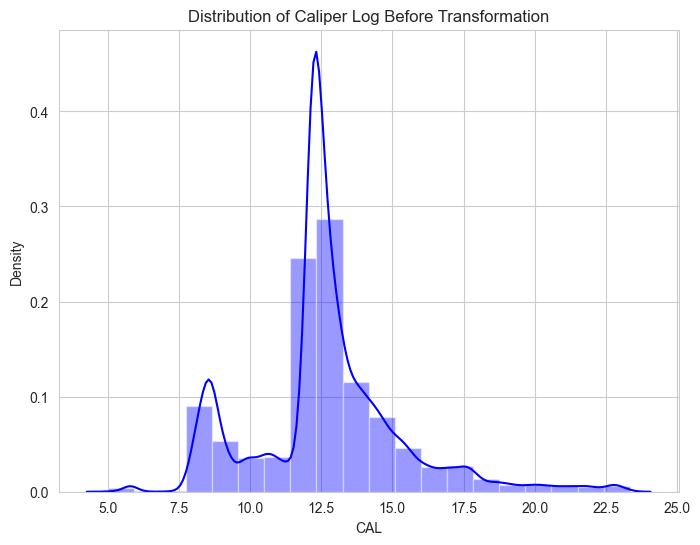

In [8]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.title('Distribution of Caliper Log Before Transformation')
sns.distplot(Nallwellsdf['CAL'], kde = True, color ='blue', bins = 20)

### Data Spliting

In [4]:
# Spllting the dataset into features and target
Xcol = ['CAL', 'GR', 'RD', 'NPHI', 'RHOB','DTP'] 

ycol = ['ShminZHs'] 

Xdf = allwellsdf[Xcol]

ydf = allwellsdf[ycol]

# Getting the testing from the database 'ydf'
y_df= ydf.iloc[:,-1].values
       
Xdf.columns, ydf.columns, Xdf.shape, y_df.shape, 

(Index(['CAL', 'GR', 'RD', 'NPHI', 'RHOB', 'DTP'], dtype='object'),
 Index(['ShminZHs'], dtype='object'),
 (72135, 6),
 (72135,))

In [5]:

# get testing data
X_train, X_test, y_train, y_test = train_test_split(Xdf, y_df, test_size=0.15, random_state=0)
X_train.shape, X_test.shape

# get training and validation data

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.17, random_state=0)

X_train.shape, y_train.shape,  X_val.shape, y_val.shape, X_test.shape, y_test.shape


((50890, 6), (50890,), (10424, 6), (10424,), (10821, 6), (10821,))

### Scaling

In [8]:
scaling = StandardScaler()
X_train1 = scaling.fit_transform(X_train)

In [9]:
X_val1 = scaling.transform(X_val)

In [10]:
X_test1 = scaling.transform(X_test)

### Hyperparameter Tuning
- Model tuning is determination of parameters (Hyperparameters) that maximize the model performance
- Model Fitting
## CatBoost Model

In [39]:
def optuna_objective(trial):
  
  param = {"learning_rate": trial.suggest_float('learning_rate', 0.001, 0.1, log= True),
       "depth": trial.suggest_int('depth', 2, 10, log=False),
        "iterations": trial.suggest_int('iterations', 500, 2000, log=False),
        "min_child_samples": trial.suggest_int('min_child_samples', 1, 100, log=False),
        "l2_leaf_reg": trial.suggest_float('l2_leaf_reg', 2, 10, log=False),
        "random_strength": trial.suggest_float('random_strength', 0, 10, log=False)
        
       
   }

  cbrrhob = CatBoostRegressor(iterations=param['iterations'], learning_rate= param['learning_rate'], depth=param['depth'], min_child_samples=param['min_child_samples'],
                             l2_leaf_reg=param['l2_leaf_reg'], random_strength=param['random_strength'], logging_level='Silent',eval_metric= 'R2')

  cbrrhob.fit(
    X_train1, y_train,
    eval_set=(X_val1, y_val), early_stopping_rounds= 60, plot = True)
    #     logging_level='Verbose',  # you can uncomment this for text output
  score = cbrrhob.best_score_

  return score['validation']['R2']

In [ ]:
studyrhob = optuna.create_study(direction = 'maximize' )
studyrhob.optimize(optuna_objective, n_trials = 100, show_progress_bar= True )


In [ ]:
# Visualization
ov.plot_optimization_history(studyrhob)

In [42]:
print(studyrhob.best_trial.params) #This will return the best hyperparameters from the optuna_objectives

{'learning_rate': 0.083385646211686, 'depth': 10, 'iterations': 1953, 'min_child_samples': 27, 'l2_leaf_reg': 4.068936799895009, 'random_strength': 3.6188089536261043}


In [43]:
trials = studyrhob.best_trial  #This will return the best optuna_objectives values (RMSE)
print('R2: {}'.format(trials.value))

R2: 0.9125999556254539


In [44]:
# Fittng of Catergorical Gradient Boost (Catboost) model to the entire dataset.
# Start by instantiating by making an instance called "cbr". 
# Learning_Rate = say 0.005 to 0.5. Iterations = 100 to 1000. Depth = 5 to 10 
cbrrhob = CatBoostRegressor(
    learning_rate=  studyrhob.best_trial.params['learning_rate'],
    # learning_rate=0.5,
    depth = studyrhob.best_trial.params['depth'],
    # depth=5,
    iterations = studyrhob.best_trial.params['iterations'],
    l2_leaf_reg = studyrhob.best_trial.params['l2_leaf_reg'],
    min_child_samples = studyrhob.best_trial.params['min_child_samples'],
    random_strength =  studyrhob.best_trial.params['random_strength'],
    
     logging_level='Silent', eval_metric= 'R2'
    # iterations=1000,
    )

In [45]:
cbrrhob.fit(
    X_train1, y_train,
    eval_set=(X_val1, y_val), early_stopping_rounds= 60, plot = True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [46]:
#Prediction of new DTP using model 'cbr' built
CBR_RHOB = cbrrhob.predict(X_test1) #This predicts the new 'DTP' feature after fitting the model 
                                    # and store in dataframe 'CBR_DTP'

In [47]:
# Estimating Model Performance on the Holdout set
R_squared = r2_score(y_test, CBR_RHOB)
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(y_test, CBR_RHOB)
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mape = mean_absolute_error(y_test, CBR_RHOB)*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(y_test, CBR_RHOB)
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(y_test, CBR_RHOB))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.9150941586492638
The value of Mean Absolute Error is: 276.8118135658729
The value of Mean Absolute Percentage Error is: 27681.18135658729
The value of Mean Squared Error is: 193763.4050974088
The value of Root Mean Squared Error is: 440.1856484455267


## Visualization of Results

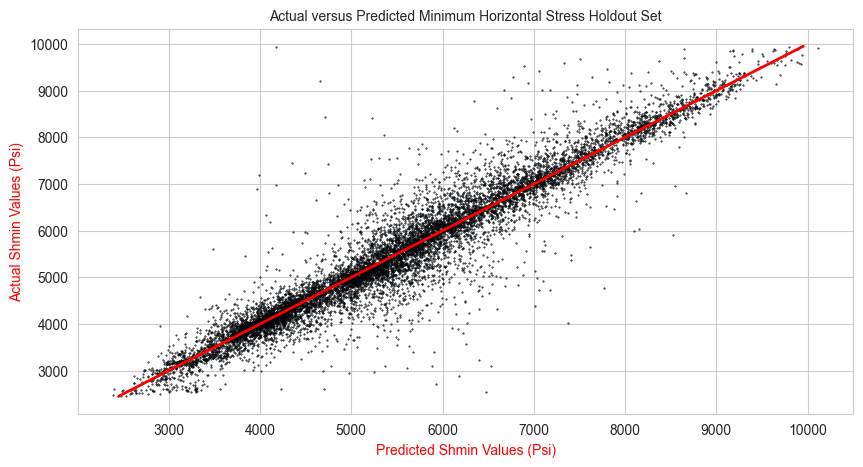

In [23]:
#Plotting of line 45 degree to know model prediction accuracy without filtered

minr,maxr= y_test.min(), y_test.max()
minr,maxr    #Getting the minimum and maximum value in the actual DTP log

# Creating some values (say 50) to make the angle 45 degree line ans store in variable 'xi'
xi = np.linspace(minr,maxr)
plt.figure(figsize=(10,5))
plt.scatter(CBR_RHOB, y_test, s = .2, edgecolors = 'black')
plt.plot(xi, xi, lw=2, c='r')
plt.title('Actual versus Predicted Minimum Horizontal Stress Holdout Set', fontsize=10)
plt.ylabel('Actual Shmin Values (Psi)', fontsize=10, color = 'r')
plt.xlabel('Predicted Shmin Values (Psi)', fontsize=10, color = 'r')
# plt.grid()
plt.show()

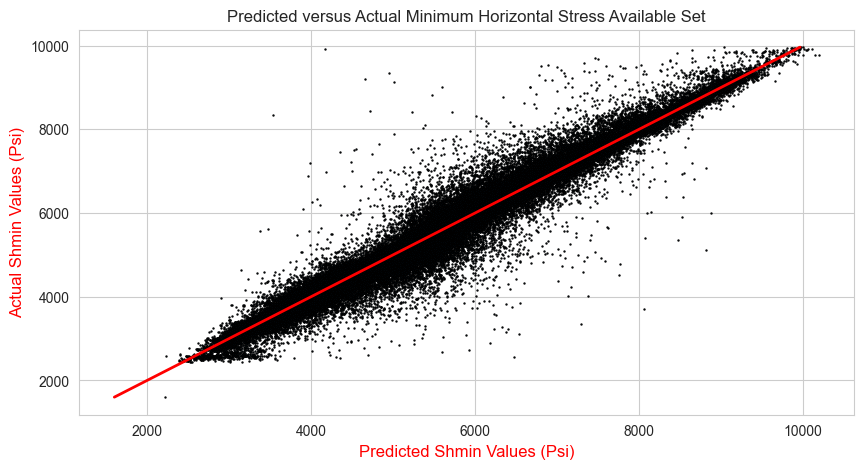

In [27]:
#Plotting of line 45 degree to know model prediction accuracy without filtered

minr,maxr= allwellsdf['ShminZHs'].min(), allwellsdf['ShminZHs'].max()
minr,maxr    #Getting the minimum and maximum value in the actual DTP log

# Creating some values (say 50) to make the angle 45 degree line ans store in variable 'xi'
xi = np.linspace(minr,maxr)
plt.figure(figsize=(10,5))
plt.scatter(allwellsdf['Shmin_PRED'], allwellsdf['ShminZHs'], s = .5, edgecolors = 'black')
plt.plot(xi, xi, lw=2, c='r')
plt.title('Predicted versus Actual Minimum Horizontal Stress Available Set', fontsize=12)
plt.ylabel('Actual Shmin Values (Psi)', fontsize=12, color = 'r')
plt.xlabel('Predicted Shmin Values (Psi)', fontsize=12, color = 'r')
# plt.grid()
plt.show()

### All the availabale Dataframe

In [ ]:
wellsdf.columns

In [24]:
x_ = scaling.transform(allwellsdf.iloc[:,5:11])

In [25]:
all_Shmin = cbrrhob.predict(x_)
allwellsdf['Shmin_PRED'] = all_Shmin
allwellsdf.head()

,WELL,X,Y,TVDss,DEPTH,CAL,GR,RD,NPHI,RHOB,...,ShminZHs,ShminZHf,ShminH,SHMAXs,SHMAXf,SHMAXE1,SHMAXE2,SHMAXE3,SHMAXE,Shmin_PRED
0,W5,467546.88,136610.87,1863.92,1982.1144,0.064645,-0.816280,-2.217540,0.47288,2.18841,...,4067.906567,4191.661823,4873.551250,4752.681988,4814.559616,4940.173506,4940.947446,4949.593820,5027.225645,4150.005113
1,W5,467546.93,136610.94,1864.06,1982.2668,0.060271,-0.707651,-1.984776,0.36911,2.19841,...,3999.364332,4129.356228,4858.441993,4718.648976,4783.644924,4898.608591,4899.453060,4908.763743,4990.002756,5073.724518
2,W5,467546.97,136611.00,1864.19,1982.4192,0.054068,-0.635823,-1.752012,0.31846,2.11851,...,4059.164962,4183.794625,4784.504563,4748.778743,4811.093575,4914.401822,4915.227084,4923.922209,4982.805798,3953.564257
3,W5,467547.02,136611.07,1864.32,1982.5716,0.050737,-0.640779,-1.519249,0.21322,2.23798,...,3909.976398,4048.130834,4876.963017,4674.426853,4743.504071,4853.849772,4854.773516,4864.986219,4956.536979,4608.464216
4,W5,467547.06,136611.13,1864.45,1982.7240,0.046428,-0.651227,-1.286485,0.34790,2.12719,...,3960.798668,4094.402343,4749.814663,4700.068381,4766.870219,4934.135577,4934.939874,4943.977049,4996.457105,3991.754567


In [26]:
# Estimating Model Performance on the Holdout set
R_squared = r2_score(allwellsdf['ShminZHs'], allwellsdf['Shmin_PRED'])
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(allwellsdf['ShminZHs'], allwellsdf['Shmin_PRED'])
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mape = mean_absolute_error(allwellsdf['ShminZHs'], allwellsdf['Shmin_PRED'])*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(allwellsdf['ShminZHs'], allwellsdf['Shmin_PRED'])
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(allwellsdf['ShminZHs'], allwellsdf['Shmin_PRED']))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.9534951296986259
The value of Mean Absolute Error is: 204.96265928687325
The value of Mean Absolute Percentage Error is: 20496.265928687324
The value of Mean Squared Error is: 106142.03178139892
The value of Root Mean Squared Error is: 325.7944624781074


## Blind Test

### Making Prection for Wells
- 'W5', 'W7', 'W10', 'W11', 'W12'

### W5 Well

In [82]:
#Working with Eight wells of Fourteen
W5wellsdf = allwellsdf[allwellsdf['WELL'].isin(['W12'])]

W5wellsdf.WELL.unique().tolist()

['W12']

In [ ]:
W5wellsdf.describe().T

In [83]:
x_W5 = scaling.transform(W5wellsdf.iloc[:,5 : 11])

In [84]:
Shmin_PRED = xgbrhob.predict(x_W5)
W5wellsdf['Shmin_PRED'] =  Shmin_PRED
W5wellsdf.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,WELL,X,Y,TVDss,DEPTH,CAL,GR,RD,NPHI,RHOB,...,ShminZHs,ShminZHf,ShminH,SHMAXs,SHMAXf,SHMAXE1,SHMAXE2,SHMAXE3,SHMAXE,Shmin_PRED
55282,W12,468858.45,135713.37,1565.87,1667.4084,0.452743,-1.489883,1.028100,0.3663,2.1727,...,2874.028163,3026.321421,3841.836575,3716.713018,3792.859647,3792.218350,3793.580674,3805.999758,3860.729955,2941.275146
55283,W12,468858.40,135713.41,1566.01,1667.5608,0.501245,-1.503407,1.170680,0.3213,2.1829,...,2831.502802,2987.681462,3839.728236,3695.686764,3773.776094,3744.751050,3746.221702,3759.194252,3816.722581,3384.507080
55284,W12,468858.35,135713.44,1566.15,1667.7132,0.549758,-1.577230,0.699063,0.2969,2.1900,...,2780.656156,2941.472284,3830.090677,3670.500636,3750.908700,3149.681592,3151.904159,3159.372170,3269.982807,3084.437500
55285,W12,468858.31,135713.48,1566.29,1667.8656,0.601043,-1.698770,0.227447,0.2900,2.1900,...,2727.402412,2893.073518,3808.518963,3644.110959,3726.946512,3361.569726,3363.720051,3375.445723,3457.384805,3068.319336
55286,W12,468858.26,135713.52,1566.43,1668.0180,0.636854,-1.819826,-0.244170,0.2900,2.1900,...,2671.585444,2842.343146,3785.895489,3616.439671,3701.818522,3627.581537,3629.362226,3644.186192,3697.161794,4039.867188


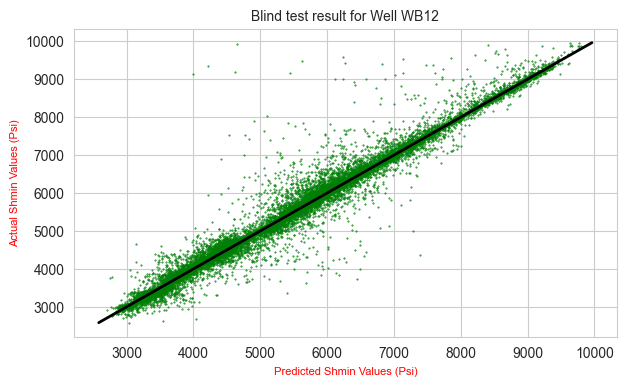

In [88]:
#Plotting of line 45 degree to know model prediction accuracy without filtered

minr,maxr= W5wellsdf['ShminZHs'].min(), W5wellsdf['ShminZHs'].max()
minr,maxr    #Getting the minimum and maximum value in the actual DTP log

# Creating some values (say 50) to make the angle 45 degree line ans store in variable 'xi'
xi = np.linspace(minr,maxr)
plt.figure(figsize=(7,4))
plt.scatter(W5wellsdf['Shmin_PRED'], W5wellsdf['ShminZHs'], s = .2, edgecolors = 'g')
plt.plot(xi, xi, lw=2, c='black')
plt.title('Blind test result for Well WB12', fontsize=10)
plt.ylabel('Actual Shmin Values (Psi)', fontsize=8, color = 'r')
plt.xlabel('Predicted Shmin Values (Psi)', fontsize=8, color = 'r')
# plt.xlim(3000, 10000)
# plt.ylim(3000, 10000)
# plt.grid()
plt.show()

In [86]:
# Estimating Model Performance on the Holdout set
R_squared = r2_score(W5wellsdf['Shmin_PRED'], W5wellsdf['ShminZHs'])
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(W5wellsdf['Shmin_PRED'], W5wellsdf['ShminZHs'])
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mape = mean_absolute_error(W5wellsdf['Shmin_PRED'], W5wellsdf['ShminZHs'])*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(W5wellsdf['Shmin_PRED'], W5wellsdf['ShminZHs'])
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(W5wellsdf['Shmin_PRED'], W5wellsdf['ShminZHs']))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.9661243595875603
The value of Mean Absolute Error is: 138.50633389925167
The value of Mean Absolute Percentage Error is: 13850.633389925168
The value of Mean Squared Error is: 79468.59987036887
The value of Root Mean Squared Error is: 281.901755706432


In [89]:
W5wellsdf['ShminZHs'].describe().T

count    16853.000000
mean      5547.526953
std       1563.707792
min       2581.978603
25%       4337.345575
50%       5459.859343
75%       6497.019519
max       9962.469074
Name: ShminZHs, dtype: float64

In [73]:
W5wellsdf.columns

Index(['WELL', 'X', 'Y', 'TVDss', 'DEPTH', 'CAL', 'GR', 'RD', 'NPHI', 'RHOB',
       'DTP', 'DTS', 'Vp', 'Vs', 'NCT', 'Ph', 'Sv', 'PP', 'Peff', 'PR', 'Pf',
       'Shmin', 'PhG', 'SvG', 'PPG', 'PeffG', 'PfG', 'ShminG', 'Edyn',
       'Edyn_GPa', 'Esta_Brad', 'Esta_L', 'Esta_B', 'UCS', 'TS', 'G_psi',
       'K_psi', 'Cb_psi', 'G/Cb_psi', 'Por', 'BC', 'ShminE', 'ShminHW',
       'ShminE1', 'ShminE2', 'ShminE3', 'ShminZHs', 'ShminZHf', 'ShminH',
       'SHMAXs', 'SHMAXf', 'SHMAXE1', 'SHMAXE2', 'SHMAXE3', 'SHMAXE',
       'Shmin_PRED'],
      dtype='object')

### Plotting of Blind test Well

In [90]:
#Function for plotting
def plotblind(df):
    fig,ax = plt.subplots(figsize= (5,20))
    ax.invert_yaxis()
    ax.plot(df.iloc[:,-10], df.iloc[:,4], label = 'Actual', color = 'r')
    
    ax.plot(df.iloc[:,-1], df.iloc[:,4], label = 'Predicted', color = 'black')
    ax.set_xlabel('Actual and Predicted Shmin(psi)', fontsize = 10, color = 'r')
    ax.set_ylabel('Depth(m)', fontsize=10, color = 'r')
    ax.legend()
    # fig.suptitle(f"{wname} Well Logs Plotting of DTS against Depth")

In [ ]:
#Plotting of the W5 logs against depth by calling the defined function plot_curve

plotblind(W5wellsdf)

## Feature Ranking

### SHAPLEY ADDITIVE EXPLANATION

In [13]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(xgbrhob)
shap_values = explainer.shap_values(X_train1)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


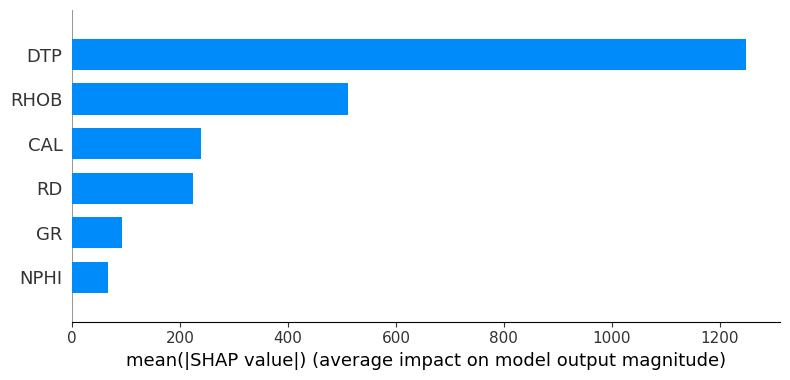

In [15]:
shap_values = shap.TreeExplainer(xgbrhob).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


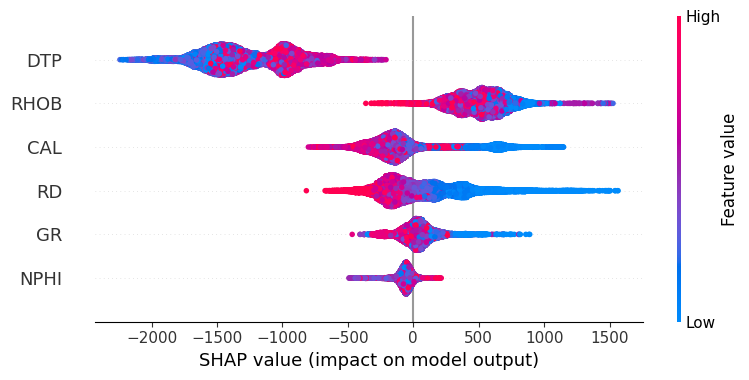

In [16]:
shap.summary_plot(shap_values, X_train)

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [ ]:
shap.plots.waterfall(shap_values, max_display=20)

### MUTUAL INFORMATION- MI

In [17]:
def make_mi_scores(X_train, y_train):
    
    mi_scores = mutual_info_regression(X_train, y_train)

    mi_scores = pd.Series(mi_scores, name="MI Scores", index = X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [18]:
mi_scores = make_mi_scores(X_train, y_train)

mi_scores
# mi_scores[::3]  # show a few features with their MI scores

DTP     0.748578
CAL     0.478566
RD      0.439412
RHOB    0.294117
NPHI    0.215244
GR      0.175873
Name: MI Scores, dtype: float64

In [37]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True)
    fig = plt.figure(figsize=(4, 6))
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Feature Importance Chart for Shmin Model", fontsize = 10)
    plt.ylabel('Feartures')
    plt.xlabel('Mutual Information Scores')

<Figure size 250x250 with 0 Axes>

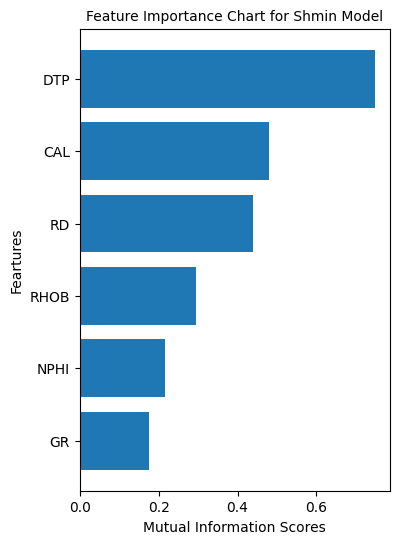

In [38]:
plt.figure(dpi=50, figsize=(5, 5))
plot_mi_scores(mi_scores)

## CatBoost For Feature Selection
- Feature Importance
- Plot the tree-based (or Gini) importance

Text(0.5, 1.0, 'Feature Importance (CatBoost Model)')

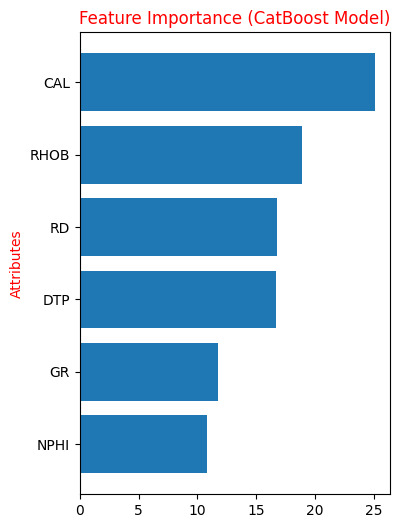

In [48]:

feature_importance = cbrrhob.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(4, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.ylabel('Attributes', c = 'r')
plt.title('Feature Importance (CatBoost Model)', c = 'r')


In [22]:
XPool = Pool(X_train1, y_train) 


In [ ]:

fr = xgbrhob.get_feature_importance(XPool)

frcols_rhob = Xdf.columns.tolist()
frcols_rhob


In [ ]:

frdf = pd.DataFrame(sorted(zip(map(lambda x: round(x,4),fr),frcols_rhob),reverse=False),columns=['Importance','Feature'])

frdf


In [ ]:
#Define size of bar plot
plt.figure(figsize=(10,4))
#Plot Searborn bar chart
sns.barplot(frdf.Feature, frdf.Importance)

plt.title('Feature Importance Chart', fontsize=15, color = 'black')
plt.xlabel('Feature Names', fontsize=15, color = 'black')
plt.ylabel('Feature Importance', fontsize=15, color = 'black')

### Plot the permutation importance.


Text(0.5, 1.0, 'Feature Importance (Permutation Importance)')

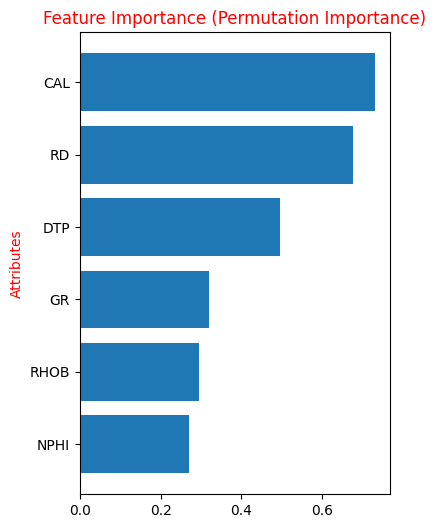

In [49]:

perm_importance = permutation_importance(cbrrhob, X_train1, y_train, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(4, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.ylabel('Attributes', c = 'r')
plt.title('Feature Importance (Permutation Importance)', c = 'r')

## eXtremely Gradient Boosting ML

In [11]:
def optuna_objective(trial):
  
    param = {"learning_rate": trial.suggest_float('learning_rate', 0.001, 0.5, log= True),
       "max_depth": trial.suggest_int('max_depth', 2, 10, log=False),
        "n_estimators": trial.suggest_int('n_estimators', 500, 2000, log=False),
        "min_child_weight": trial.suggest_int('min_child_weight', 1, 100, log=False),
        "gamma": trial.suggest_float('gamma', 0, 1, log=False),
        "Lambda": trial.suggest_float('Lambda', 0, 1, log=False)}
    
    
    xgbrhob = xgb.XGBRegressor(n_estimators=param['n_estimators'],learning_rate= param['learning_rate'], max_depth=param['max_depth'], 
                              min_child_weight=param['min_child_weight'], gamma=param['gamma'], Lambda=param['Lambda'])

    xgbrhob.fit(
    X_train1, y_train,
    eval_set=[(X_val1, y_val)], early_stopping_rounds= 60, verbose = False)
    logging_level='Verbose',  # you can uncomment this for text output
    y_val_pred = xgbrhob.predict(X_val1)
    print(type(y_val_pred))
    r2 = r2_score(y_val,y_val_pred)
    # MAE = mean_absolute_error(y_val,y_val_pred)

    # MAPE = mape = mean_absolute_error(y_val,y_val_pred)*100

    # MSE = mean_squared_error(y_val,y_val_pred)

    # rmse = sqrt(mean_squared_error(y_val,y_val_pred))

    # return r2, 
    return r2




In [ ]:
studyrhob = optuna.create_study(direction = 'maximize' )
studyrhob.optimize(optuna_objective, n_trials = 400, show_progress_bar= True) 

In [14]:
print(studyrhob.best_trial.params) #This will return the best hyperparameters from the optuna_objectives

{'learning_rate': 0.07737321651362582, 'max_depth': 10, 'n_estimators': 1560, 'min_child_weight': 1, 'gamma': 0.39657167037759017, 'Lambda': 0.5873570083554751}


In [15]:
trials = studyrhob.best_trial  #This will return the best optuna_objectives values (RMSE)
print('R2: {}'.format(trials.value))

R2: 0.9027630933018284


In [6]:
# Fittng of Catergorical Gradient Boost (Catboost) model to the entire dataset.
# Start by instantiating by making an instance called "cbr". 
# Learning_Rate = say 0.005 to 0.5. Iterations = 100 to 1000. Depth = 5 to 10 
xgbrhob = xgb.XGBRegressor(
    learning_rate= 0.07737321651362582,
    # learning_rate=0.5,
    max_depth = 10,
    # depth=5,
    n_estimators = 1560,
    Lambda = 0.5873570083554751,
    min_child_weight = 1,
    gamma = 0.39657167037759017,
    # iterations=1000,
    )

In [16]:
# Fittng of Catergorical Gradient Boost (Catboost) model to the entire dataset.
# Start by instantiating by making an instance called "cbr". 
# Learning_Rate = say 0.005 to 0.5. Iterations = 100 to 1000. Depth = 5 to 10 
xgbrhob = xgb.XGBRegressor(
    learning_rate= studyrhob.best_trial.params['learning_rate'],
    # learning_rate=0.5,
    max_depth = studyrhob.best_trial.params['max_depth'],
    # depth=5,
    n_estimators = studyrhob.best_trial.params['n_estimators'],
    Lambda = studyrhob.best_trial.params['Lambda'],
    min_child_weight = studyrhob.best_trial.params['min_child_weight'],
    gamma = studyrhob.best_trial.params['gamma'],
    # iterations=1000,
    )

In [11]:
 xgbrhob.fit(
    X_train1, y_train,
    eval_set=[(X_val1, y_val)], early_stopping_rounds= 60, verbose = False)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10:26:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "Lambda" } are not used.



XGBRegressor(Lambda=0.5873570083554751, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.39657167037759017, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.07737321651362582, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1560, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [12]:
#Prediction of new DTP using model 'cbr' built
xgb_RHOB = xgbrhob.predict(X_test1) #This predicts the new 'DTP' feature after fitting the model 
                                    # and store in dataframe 'CBR_DTP'

In [23]:
# Estimating Model Performance on the Holdout set
R_squared = r2_score(y_test, xgb_RHOB)
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(y_test, xgb_RHOB)
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mape = mean_absolute_error(y_test, xgb_RHOB)*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(y_test, xgb_RHOB)
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(y_test, xgb_RHOB))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.9053694627945813
The value of Mean Absolute Error is: 284.41290707779933
The value of Mean Absolute Percentage Error is: 28441.290707779932
The value of Mean Squared Error is: 215956.10883090275
The value of Root Mean Squared Error is: 464.7107797661926


## Visualization of Results

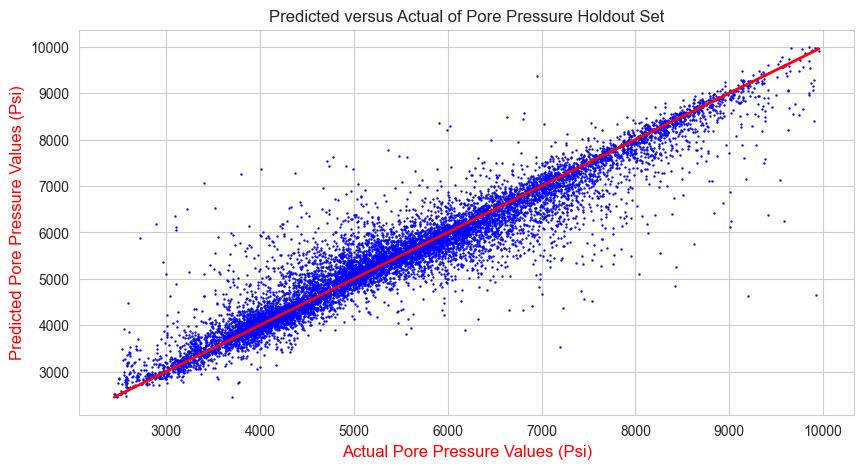

In [14]:
#Plotting of line 45 degree to know model prediction accuracy without filtered

minr,maxr= y_test.min(), y_test.max()
minr,maxr    #Getting the minimum and maximum value in the actual DTP log

# Creating some values (say 50) to make the angle 45 degree line ans store in variable 'xi'
xi = np.linspace(minr,maxr)
plt.figure(figsize=(10,5))
plt.scatter(y_test, xgb_RHOB, s = .5, edgecolors='b')
plt.plot(xi, xi, lw=2, c='r')
plt.title('Predicted versus Actual of Pore Pressure Holdout Set', fontsize=12)
plt.xlabel('Actual Pore Pressure Values (Psi)', fontsize=12, color = 'r')
plt.ylabel('Predicted Pore Pressure Values (Psi)', fontsize=12, color = 'r')
# plt.grid()
plt.show()

### Linear Regression Implementation

In [12]:
from datetime import datetime, timedelta

In [66]:
# sckit-learn implementation
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train1, y_train)
start = datetime.now()
stop = datetime.now()
delta = stop - start
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

Time to compute:  0.0 seconds


In [67]:
# Predict validation set
lr_predval = regression_model.predict(X_val1)

# Predict holdout set
lr_predtest = regression_model.predict(X_test1)




In [68]:
# Estimating Model Performance on the Validation set
R_squared = r2_score(y_val, lr_predval)
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(y_val, lr_predval)
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mape = mean_absolute_error(y_val, lr_predval)*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(y_val, lr_predval)
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(y_val, lr_predval))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.44367574970454615
The value of Mean Absolute Error is: 846.0518674182543
The value of Mean Absolute Percentage Error is: 84605.18674182544
The value of Mean Squared Error is: 1282564.8271693804
The value of Root Mean Squared Error is: 1132.5037868234174


In [69]:
# Estimating Model Performance on the Holdout set
R_squared = r2_score(y_test, lr_predtest)
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(y_test, lr_predtest)
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mape = mean_absolute_error(y_test, lr_predtest)*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(y_test, lr_predtest)
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(y_test, lr_predtest))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.42871403508876404
The value of Mean Absolute Error is: 846.7055979479966
The value of Mean Absolute Percentage Error is: 84670.55979479966
The value of Mean Squared Error is: 1303730.2508822032
The value of Root Mean Squared Error is: 1141.8100765373388


In [ ]:
# printing values intercept and slope coefficients
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)

# linear_reg = ('Linear Regression', r2, err, seconds)

## Visualization of Results

In [ ]:
#Plotting of line 45 degree to know model prediction accuracy without filtered

minr,maxr= y_test.min(), y_test.max()
minr,maxr    #Getting the minimum and maximum value in the actual DTP log

# Creating some values (say 50) to make the angle 45 degree line ans store in variable 'xi'
xi = np.linspace(minr,maxr)
plt.figure(figsize=(10,5))
plt.scatter(y_test, lr_predtest, s = .5, edgecolors='b')
plt.plot(xi, xi, lw=2, c='r')
plt.title('Predicted versus Actual of Pore Pressure Holdout Set', fontsize=12)
plt.xlabel('Actual Pore Pressure Values (Psi)', fontsize=12, color = 'r')
plt.ylabel('Predicted Pore Pressure Values (Psi)', fontsize=12, color = 'r')
plt.grid()
plt.show()

## Random Forest Regressor

In [79]:
def optuna_objective(trial):
  
    param = { "max_depth": trial.suggest_int('max_depth', 2, 10, log=False),
        "n_estimators": trial.suggest_int('n_estimators', 500, 2000, log=False),
        
        "max_features": trial.suggest_categorical('max_features', ['auto']),
        # "max_features": ['auto', 'sqrt'],
        
        "min_samples_leaf": trial.suggest_int('min_samples_leaf', 2, 10, log=False),
        "min_samples_split": trial.suggest_int('min_samples_split', 2, 10, log=False)}
    
    
    rfrhob = RandomForestRegressor(n_estimators=param['n_estimators'], max_features = param['max_features'],  max_depth=param['max_depth'],
                              min_samples_leaf=param['min_samples_leaf'], min_samples_split=param['min_samples_split'])

    # rfrhob.fit(
    # X_train1, y_train,
    # eval_set = [(X_val1, y_val)], early_stopping_rounds= 60, verbose = False)
    # logging_level='Verbose',  # you can uncomment this for text output
    # y_val_pred = rfrhob.predict(X_val1)
    # print(type(y_val_pred))
    # r2 = r2_score(y_val,y_val_pred)
    # return r2

 # tfidf__lowercase = trial.suggest_categorical('tfidf__lowercase', [False, True])

    return  -np.mean(cross_val_score(rfrhob, X_train1, y_train,  cv = 5, n_jobs=-1, scoring='neg_mean_squared_error'))

    # rfrhob.fit(
    # X_train1, y_train,
    # eval_set=(X_val1, y_val), early_stopping_rounds= 60, plot = True)
    # #     logging_level='Verbose',  # you can uncomment this for text output
    # score = cbrrhob.best_score_

    # return score['validation']['R2']

In [ ]:
studyrhob = optuna.create_study(direction = 'minimize' )
studyrhob.optimize(optuna_objective, n_trials = 80, show_progress_bar= True) 

In [ ]:
print(studyrhob.best_trial.params) #This will return the best hyperparameters from the optuna_objectives

In [1]:
trials = studyrhob.best_trial  #This will return the best optuna_objectives values (RMSE)
print('R2: {}'.format(trials.value))

NameError: name 'studyrhob' is not defined

In [13]:
# Trial 51 {'max_depth': 10, 'n_estimators': 1095, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3}
# create regressor object
regressor = RandomForestRegressor(n_estimators = 1095, max_depth = 10, max_features = 'auto',min_samples_leaf = 2, min_samples_split = 3)
 
# fit the regressor with training dataset
regressor.fit(X_train1, y_train)

start = datetime.now()
stop = datetime.now()
delta = stop - start
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


Time to compute:  0.0 seconds


In [14]:
# Predict validation set
rfr_predval = regressor.predict(X_val1)

# Predict holdout set
rfr_predtest = regressor.predict(X_test1)




In [15]:
# Estimating Model Performance on the Validation set
R_squared = r2_score(y_val, rfr_predval)
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(y_val, rfr_predval)
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mape = mean_absolute_error(y_val, rfr_predval)*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(y_val, rfr_predval)
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(y_val, rfr_predval))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.8319967899228182
The value of Mean Absolute Error is: 412.0748759101448
The value of Mean Absolute Percentage Error is: 41207.48759101448
The value of Mean Squared Error is: 387319.1002946695
The value of Root Mean Squared Error is: 622.3496607974247


In [16]:
# Estimating Model Performance on the Holdout set
R_squared = r2_score(y_test, rfr_predtest)
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(y_test, rfr_predtest)
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mape = mean_absolute_error(y_test, rfr_predtest)*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(y_test, rfr_predtest)
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(y_test, rfr_predtest))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.831593268292889
The value of Mean Absolute Error is: 409.60667196965136
The value of Mean Absolute Percentage Error is: 40960.667196965136
The value of Mean Squared Error is: 384320.5750956572
The value of Root Mean Squared Error is: 619.9359443488152


### Visualizing Results

In [ ]:
%matplotlib inline
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

data = joblib.load('study.pkl')

df = data.trials_dataframe()
df.dropna(inplace=True)
df.reset_index(inplace=True)

df['time'] = (df.datetime_complete - df.datetime_start).dt.total_seconds()
df = df[df.time>=0]


print('best val:',  round(df.value.min(),4))
print('best params:',  data.best_params)

a = sns.lineplot(x=df.index, y=df.value.cummin())
a.set_xlabel('trial number')
sns.scatterplot(x = df.index, y = df.value, color='red')
a.set_ylabel('neg_mean_squared_error')
a.legend(['best value', "trial's value"]);

## Decision Tree Regressor

In [ ]:
param = {'max_depth': [7], #np.linspace(1, 10, 10) The maximum depth of the tree
          'max_features': ['auto', 'sqrt'], #The number of features to consider when looking for the best split
          'min_samples_leaf': [7], #[3,4,5,6,7,8] The minimum number of samples required to be at a leaf node
          'min_samples_split': [0.1], #np.linspace(0.1, 1.0, 10) The minimum number of samples required to split an internal node
          'criterion': ['mse'] #The function to measure the quality of a split
         }

tree = DecisionTreeRegressor()
rs = GridSearchCV(estimator=tree, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)

tree = rs.best_estimator_
start = datetime.now()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
stop = datetime.now()
delta = stop - start

### SVR

In [84]:
from sklearn.svm import SVR

In [ ]:
params = {'C': [100],         #'C': [0.1,1,10,100]
        'gamma': [1],     #'gamma': [0.01,0.1,1,10]
        'kernel': ['linear'],   
       }

svr = SVR()
rs = GridSearchCV(estimator=svr, param_grid=params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train_fold, y_train_fold)
print(rs.best_estimator_)
svr = rs.best_estimator_

svr = SVR(C=100, gamma=1, kernel='linear')
start = datetime.now()
svr.fit(X_train, y_train)
pred = svr.predict(X_test)
stop = datetime.now()
delta = stop - start


param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

In [62]:
def optuna_objective(trial):
  
    param = { "C": trial.suggest_int('C', 2, 10, log=False), #C = regularization parameter
        "degree ": trial.suggest_int('degree ', 1, 10, log=False), # Degree of the polynomial kernel function (‘poly’)
        "gamma": trial.suggest_int('gamma', 1, 10, log=False), # Kernel coefficient

        "kernel": trial.suggest_categorical('kernel', ['rbf'])}

        # "kernel": trial.suggest_categorical('kernel', ['rbf', 'poly', 'sigmoid', 'linear'])}
    
    
    svr_rhob =SVR(degree = param['degree '], kernel = param['kernel'],  C = param['C'],
                              gamma = param['gamma'])


    return  -np.mean(cross_val_score(svr_rhob, X_train1, y_train,  cv = 5, n_jobs=-1, scoring='neg_mean_squared_error'))

    # rfrhob.fit(
    # X_train1, y_train,
    # eval_set=(X_val1, y_val), early_stopping_rounds= 60, plot = True)
    # #     logging_level='Verbose',  # you can uncomment this for text output
    # score = cbrrhob.best_score_

    # return score['validation']['R2']

In [63]:
studyrhob = optuna.create_study(direction = 'minimize' )
studyrhob.optimize(optuna_objective, n_trials = 20, show_progress_bar= True) 

[I 2023-03-01 14:16:21,575] A new study created in memory with name: no-name-72f19149-c743-42b9-9b15-8bced7646804
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-03-01 14:19:11,640] Trial 0 finished with value: 1168506.0648979107 and parameters: {'C': 6, 'degree ': 9, 'gamma': 2, 'kernel': 'rbf'}. Best is trial 0 with value: 1168506.0648979107.
[I 2023-03-01 14:22:02,853] Trial 1 finished with value: 1141899.267868136 and parameters: {'C': 3, 'degree ': 10, 'gamma': 1, 'kernel': 'rbf'}. Best is trial 1 with value: 1141899.267868136.
[I 2023-03-01 14:25:12,129] Trial 2 finished with value: 2005257.5510158055 and parameters: {'C': 9, 'degree ': 2, 'gamma': 10, 'kernel': 'rbf'}. Best is trial 1 with value: 1141899.267868136.
[I 2023-03-01 14:27:58,230] Trial 3 finished with value: 1888447.1854675927 and parameters: {'C': 2, 'degree ': 2, 'gamma': 3, 'kernel': 'rbf'}. Best is trial 1 with value: 1141899.267868136.
[I 2023-03-01 14:30:57,951] Trial 4 finished with value: 2066327.9204009864 and parameters: {'C': 7, 'degree ': 3, 'gamma': 10, 'kernel': 'rbf'}. Best is trial 1 with value: 1141899.267868136.
[I 2023-03-01 14:33:59,504] Trial 5 f

In [ ]:
print(studyrhob.best_trial.params) #This will return the best hyperparameters from the optuna_objectives

: 

In [65]:
trials = studyrhob.best_trial  #This will return the best optuna_objectives values (RMSE)
print('R2: {}'.format(trials.value))

R2: 1035435.7838090161


In [72]:
svr = SVR( C = 100, gamma = 1, kernel='rbf', degree = 8)
svr.fit(X_train1, y_train)
start = datetime.now()
stop = datetime.now()
delta = stop - start
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

Time to compute:  0.0 seconds


In [73]:
# Predict validation set
svr_predval = svr.predict(X_val1)

# Predict holdout set
svr_predtest = svr.predict(X_test1)




In [74]:
# Estimating Model Performance on the Validation set
R_squared = r2_score(y_val, svr_predval)
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(y_val, svr_predval)
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mape = mean_absolute_error(y_val, svr_predval)*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(y_val, svr_predval)
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(y_val, svr_predval))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.8328414303131605
The value of Mean Absolute Error is: 382.10788909479146
The value of Mean Absolute Percentage Error is: 38210.788909479146
The value of Mean Squared Error is: 385371.8437160028
The value of Root Mean Squared Error is: 620.7832501896316


In [75]:
# Estimating Model Performance on the Holdout set
R_squared = r2_score(y_test, svr_predtest)
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(y_test, svr_predtest)
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mape = mean_absolute_error(y_test, svr_predtest)*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(y_test, svr_predtest)
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(y_test, svr_predtest))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.8274732191538514
The value of Mean Absolute Error is: 384.36133073875385
The value of Mean Absolute Percentage Error is: 38436.13307387538
The value of Mean Squared Error is: 393722.92878120445
The value of Root Mean Squared Error is: 627.4734486663197


### K-Nearest Neighbors Regressor

In [ ]:
param = {
    'n_neighbors': [9],  #'n_neighbors': [3,4,5,6,7,8,9,10,11,12], Number of neighbor points to consider for prediction
    'weights': ['distance'],  #'weights': ['uniform', 'distance'], weight function used in prediction
    'p': [1]  #'p': [1,2] # p=1 compute manhattan distance, p=2 compute euclidean distance
    }

knn = KNeighborsRegressor()
rs = GridSearchCV(estimator=knn, param_grid=params, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)
knn = rs.best_estimator_
start = datetime.now()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
stop = datetime.now()
delta = stop - start


## Neural Network

In [ ]:
### Code Setup
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

# from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import time

## Hyperparameters Tuning

In [ ]:

def hyper_trial(initializer='uniform', activation='relu', optimizer='adam', loss='mse'):
    
    # create ANN model
    model = Sequential()
    # # Defining the Input layer and FIRST hidden layer, both are same!
    model.add(Dense(units = 128, input_dim = X_train1.shape[1], kernel_initializer = initializer, activation = activation))
    # Defining the Second layer of the model
    model.add(Dense(units = 256, kernel_initializer = initializer, activation = activation))
    # The output neuron (single fully connected node)
    model.add(Dense(1, kernel_initializer = initializer))
    # Compiling the model
    model.compile(loss = 'mean_squared_error', optimizer = optimizer)

    return model
# Set paramaters to tune ('activation','batch_size','epochs','initializer', loss', 'optimizer') 
param_grid = {
    'initializer': ['normal', 'uniform'],
    'activation': ['relu'],
    'optimizer': ['adam', 'rmsprop'],
    'loss': ['mae'],
    'batch_size': [30, 40, 50],
    'epochs': [30, 40, 50],
   }


# Creating the Grid searching space
# scoring metthod was also defined
grid_search = GridSearchCV(
    estimator=KerasRegressor(hyper_trial, verbose = 0),
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',)


# Measuring how much time it took to find the best params
# start time
start_time = time.time()

# Running Grid Search for different paramenters
grid_search.fit(X_train1, y_train, validation_data = (X_val1, y_val), verbose = 1)

# End time
end_time = time.time()

# Printing the total time taken

print("########## The Total Time Taken: ", round((end_time-start_time)/60), 'Minutes')


In [ ]:
grid_search.best_params_

{'activation': 'relu',
 'batch_size': 10,
 'epochs': 10,
 'initializer': 'normal',
 'loss': 'mse',
 'optimizer': 'adam'}

### Model Train

In [ ]:
NN_model = Sequential()
# Defining the first layer of the model
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train1.shape[1], activation='relu'))
# Defining the Second layer of the model
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
NN_model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
NN_model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mean_squared_error'])

# Fitting the ANN to the Training set
# model.fit(X_train1, y_trainN, batch_size = 5, epochs = 50, verbose=0)


In [ ]:
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 34,177
Trainable params: 34,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model
history = NN_model.fit(
    X_train1,
    y_train, 
    epochs = 160, 
    batch_size = 64,
    # validation_split=0.2
    validation_data = (X_val1, y_val)
)

Epoch 1/160
796/796 [==============================] - 4s 5ms/step - loss: 480327.2812 - mean_squared_error: 480327.2812 - val_loss: 475512.7812 - val_mean_squared_error: 475512.7812
Epoch 2/160
796/796 [==============================] - 4s 4ms/step - loss: 478854.1875 - mean_squared_error: 478854.1875 - val_loss: 474698.7500 - val_mean_squared_error: 474698.7500
Epoch 3/160
796/796 [==============================] - 4s 5ms/step - loss: 477801.5938 - mean_squared_error: 477801.5938 - val_loss: 476360.7500 - val_mean_squared_error: 476360.7500
Epoch 4/160
796/796 [==============================] - 3s 4ms/step - loss: 477075.1875 - mean_squared_error: 477075.1875 - val_loss: 471627.3438 - val_mean_squared_error: 471627.3438
Epoch 5/160
796/796 [==============================] - 4s 4ms/step - loss: 475798.7812 - mean_squared_error: 475798.7812 - val_loss: 469123.8750 - val_mean_squared_error: 469123.8750
Epoch 6/160
796/796 [==============================] - 4s 5ms/step - loss: 474278.812

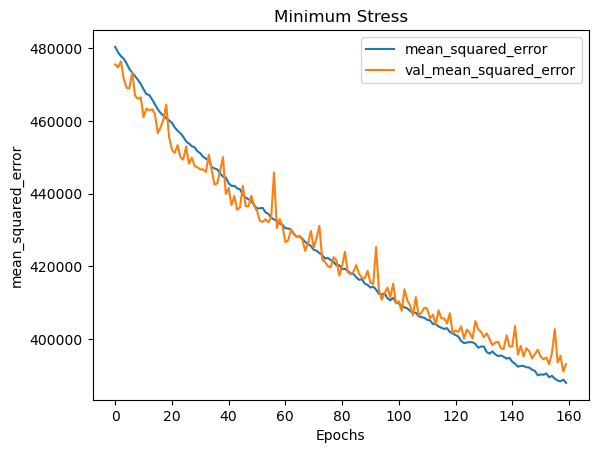

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.title('Minimum Stress', fontsize=12)
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_error')

In [ ]:
y_valNpred = NN_model.predict(X_val1)
y_testpred = NN_model.predict(X_test1)

339/339 [==============================] - 1s 2ms/step


In [ ]:
# Estimating Model Performance on the Holdout set
R_squared = r2_score(y_val, y_valNpred)
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(y_val, y_valNpred)
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mean_absolute_error(y_val, y_valNpred)*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(y_val, y_valNpred)
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(y_val, y_valNpred))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.8294949917769994
The value of Mean Absolute Error is: 427.0734223984525
The value of Mean Absolute Percentage Error is: 42707.34223984525
The value of Mean Squared Error is: 393086.8127479747
The value of Root Mean Squared Error is: 626.9663569506539


In [ ]:
# Estimating Model Performance on the Holdout set
R_squared = r2_score(y_test, y_testpred)
print(f'The value of R_squared is: {R_squared}')

MAE = mean_absolute_error(y_test, y_testpred)
print(f'The value of Mean Absolute Error is: {MAE}')

MAPE = mean_absolute_error(y_test, y_testpred)*100
print(f'The value of Mean Absolute Percentage Error is: {MAPE}')

MSE = mean_squared_error(y_test, y_testpred)
print(f'The value of Mean Squared Error is: {MSE}')

rmse = sqrt(mean_squared_error(y_test, y_testpred))
print(f'The value of Root Mean Squared Error is: {rmse}')



The value of R_squared is: 0.8261664387971948
The value of Mean Absolute Error is: 427.52644310203925
The value of Mean Absolute Percentage Error is: 42752.64431020393
The value of Mean Squared Error is: 396705.1289171671
The value of Root Mean Squared Error is: 629.8453214219878


In [ ]:
#Plotting of line 45 degree to know model prediction accuracy without filtered

minr,maxr= y_testN.min(), y_testN.max()
minr,maxr    #Getting the minimum and maximum value in the actual DTP log

# Creating some values (say 50) to make the angle 45 degree line ans store in variable 'xi'
xi = np.linspace(minr,maxr)
plt.figure(figsize=(10,5))
plt.scatter(y_testN, y_testpred, s = .5, edgecolors='b')
plt.plot(xi, xi, lw=2, c='r')
plt.title('Predicted versus Actual of Pore Pressure Holdout Set', fontsize=12)
plt.xlabel('Actual Pore Pressure Values (Psi)', fontsize=12, color = 'r')
plt.ylabel('Predicted Pore Pressure Values (Psi)', fontsize=12, color = 'r')
plt.grid()
plt.show()